In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f,x,h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中

In [3]:
def use_svg_display():  #@save
     """"使用svg格式在Jupyter中显示绘图"""
     backend_inline.set_matplotlib_formats('svg')

In [4]:
def set_figsize(figsize=(3.5,2.5)):
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [5]:
#@save
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """"设置malplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_ysscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

fig(figure)就是一张画布，，Axes代表的则是纸中的一片区域（当然可以有多个区域，这是后续要说到的subplots），axis是类似数轴的对象（最初的图中以绿色圈出）。他们负责设置图形限制并生成刻度（轴上的标记）和刻度标签（标记刻度的字符串）

In [6]:
#@save
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',
         fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    """"绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    #如果x有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X,"nidm") and X.nidm == 1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X = [X]

    if Y is None:
        X,Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x,y,fmt in zip(X,Y,fmts):
         if len(x):
             axes.plot(x,y,fmt)
         else:
             axes.plot(y,fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

TypeError: object of type 'numpy.float64' has no len()

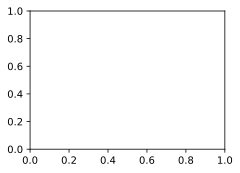

In [7]:
x = np.arange(0,3,0.1)
plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Target line (x = 1)'])

d2l里的gca()缺失了，暂时先跳过

In [19]:
import torch

x = torch.arange(4.0)
print(x)
x.requires_grad_(True)#为True时才保留梯度
print(x.grad)
y = 2 * torch.dot(x,x)
print(y)
y.backward()#返回关于变量的梯度
print(x.grad)#返回关于x的梯度

tensor([0., 1., 2., 3.])
None
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])
